# ImageDataGenerator Intro

ImageDataGenerator returns a generator object. The generator returns a batch of data when is called. We can use **flow()** method to get the batches. 

When use the results of the Image data generator, we can use **fit_transform()** to pass the argumented images to the model

```python
model.fit_generator(data_gen.flow(X_train, Y_train, batch_size=batch_size),
                    steps_per_epoch=len(X_train)/batch_size,
                    epochs=nb_epoch)
```

In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt


# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure(figsize=(8,8))

for i in range(6):
    plt.subplot(231+i)
    plt.title(y_train[i])
    plt.axis('off')
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    
plt.show()

Using TensorFlow backend.


<Figure size 800x800 with 6 Axes>

# Random Rotations

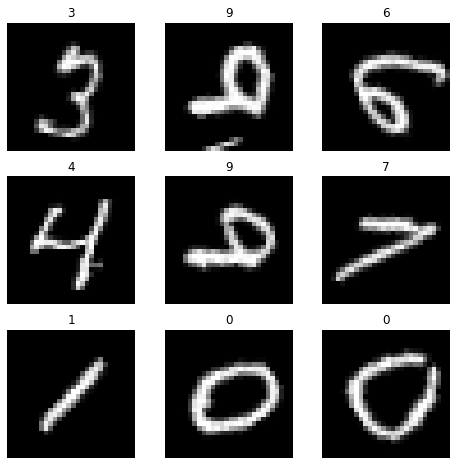

In [2]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert pixel values from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Define max rotate angle of image generator 
data_gen = ImageDataGenerator(rotation_range=90)  

# Train image generator
data_gen.fit(X_train)

# Plot result
for X_batch, y_batch in data_gen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        plt.subplot(331 + i)
        plt.title(y_batch[i])
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        plt.axis('off')
    plt.show()
    break

# Random Shift

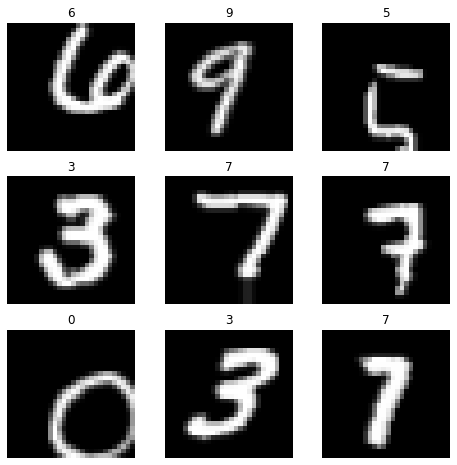

In [3]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert pixel values from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Define max shift in width and height
shift=0.2
data_gen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

# Train the generator
data_gen.fit(X_train)

# Plot
for X_batch, y_batch in data_gen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break

# Random Shear

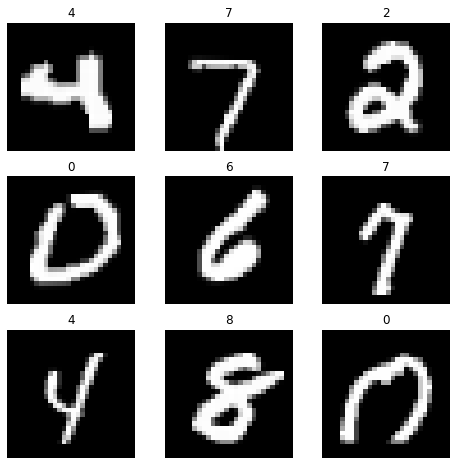

In [4]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert pixel values from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Define max shear range
shear_range = 1.25
data_gen = ImageDataGenerator(shear_range=shear_range)

data_gen.fit(X_train)

# Plot
for X_batch, y_batch in data_gen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break

# Random Flips

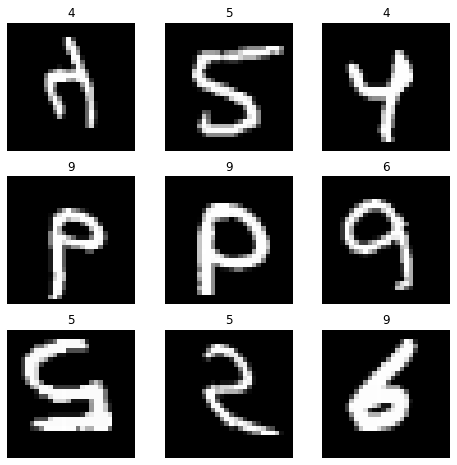

In [5]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert pixel values from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Define flipping params, allow horizontal and vertical flip
data_gen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

data_gen.fit(X_train)

# Plot
for X_batch, y_batch in data_gen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break

# Feature Standardization

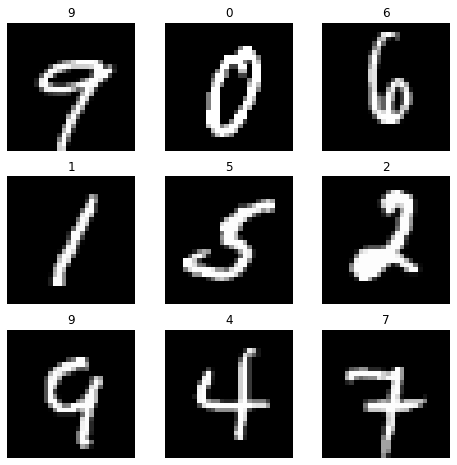

In [6]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert pixel values from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Define flipping params, allow horizontal and vertical flip
data_gen = ImageDataGenerator(featurewise_center=True, 
                              featurewise_std_normalization=True)

data_gen.fit(X_train)

# Plot
for X_batch, y_batch in data_gen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break

## ZCA Whitening

/hpc/home/ephyan/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


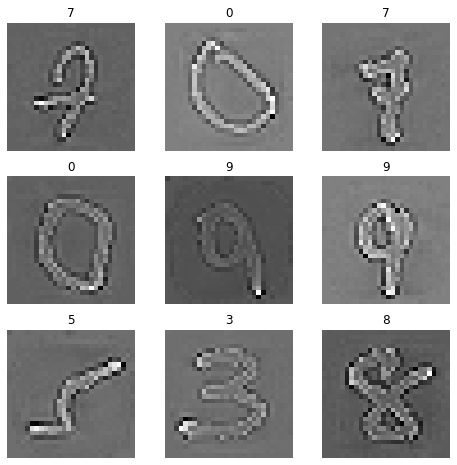

In [7]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert pixel values from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Define flipping params, allow horizontal and vertical flip
data_gen = ImageDataGenerator(zca_whitening=True)

data_gen.fit(X_train)

# Plot
for X_batch, y_batch in data_gen.flow(X_train, y_train, batch_size=9):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break

# Saving Augumented Images to File

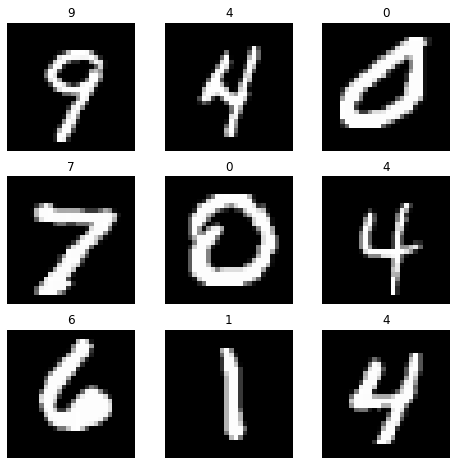

In [8]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape images
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert pixel values from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Define flipping params, allow horizontal and vertical flip
data_gen = ImageDataGenerator()

data_gen.fit(X_train)

if not os.path.exists('images'):
    os.makedirs('images')

# Plot
for X_batch, y_batch in data_gen.flow(X_train, y_train, batch_size=9, 
                                      save_to_dir='images', save_prefix='aug', save_format='png'):
    plt.figure(figsize=(8, 8))
    for i in range(9):
        plt.subplot(331+i)
        plt.title(y_batch[i])
        plt.axis('off')
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        
    plt.show()
    break